In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load AI-enhanced dataset
df = pd.read_csv("../data/llm_summaries_output.csv")

# Preview structure
df.head()

ticker  prev_close    open  gap_pct                   timestamp    rsi  \
0   NVDA      159.34  158.20    -0.72  2025-07-07T22:32:41.297468  75.22   
1   TSLA      315.35  291.37    -7.60  2025-07-07T22:32:41.472511  38.26   
2   AAPL      213.55  212.68    -0.41  2025-07-07T22:32:41.621568  72.67   
3    AMD      137.91  136.56    -0.98  2025-07-07T22:32:41.758866  72.14   
4   MSFT      498.84  497.38    -0.29  2025-07-07T22:32:41.943069  73.44   

   rel_volume  dist_from_5d_high  dist_from_5d_low  \
0        0.81              -1.70              4.46   
1        1.23              -9.72              1.79   
2        0.77              -2.90              5.36   
3        0.92              -7.67              0.97   
4        0.75              -0.61              1.85   

                                         llm_summary  
0  1. NVDA is showing signs of being overbought w...  
1  1. Technically, TSLA is showing bearish signs ...  
2  1. Technically, AAPL is showing signs of being...  
3  1. Technically, AMD is showing a somewhat bear...  
4  1. Technically, Microsoft (MSFT) is showing si...

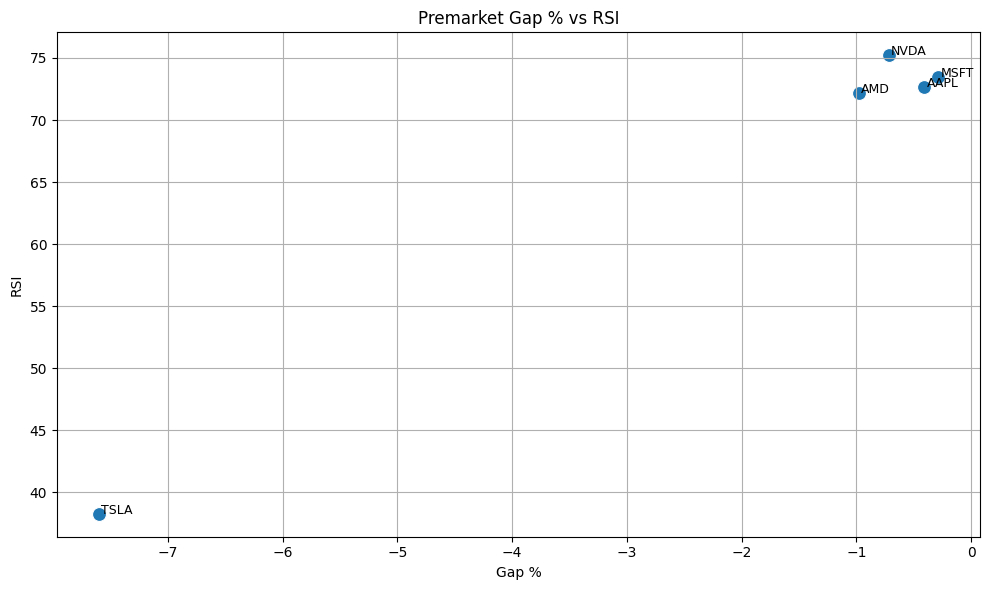

In [2]:
#  Visualize how much each stock is gapping up/down (Gap %) vs. technical momentum (RSI)
# - Gap % on X-axis: how much the stock moved from yesterday’s close to today’s open
# - RSI on Y-axis: momentum indicator showing whether the stock is overbought (>70) or oversold (<30)
# - This scatter plot helps identify:
#     • Momentum breakouts (high gap %, high RSI)
#     • Potential reversals (high gap %, low RSI)
#     • Hidden divergences or quiet setups

# Plot Gap % vs RSI
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="gap_pct", y="rsi", s=100)

# Annotate tickers
for _, row in df.iterrows():
    plt.text(row["gap_pct"] + 0.02, row["rsi"], row["ticker"], fontsize=9)

plt.title("Premarket Gap % vs RSI")
plt.xlabel("Gap %")
plt.ylabel("RSI")
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipykernel_23415/1961827031.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="ticker", y="rel_volume", palette="crest")


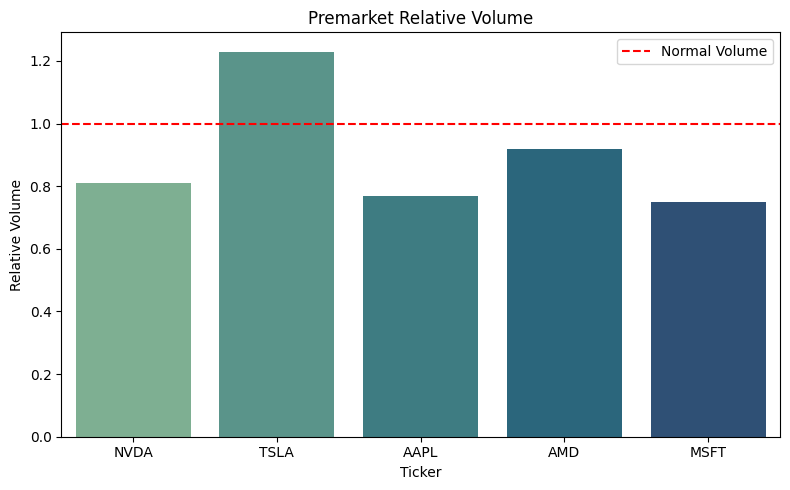

In [3]:
# Show which stocks have unusually high volume this morning (i.e., which ones are “in play”).

# Barplot: Relative Volume by Ticker
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="ticker", y="rel_volume", palette="crest")
plt.title("Premarket Relative Volume")
plt.ylabel("Relative Volume")
plt.xlabel("Ticker")
plt.axhline(1.0, color="red", linestyle="--", label="Normal Volume")
plt.legend()
plt.tight_layout()
plt.show()

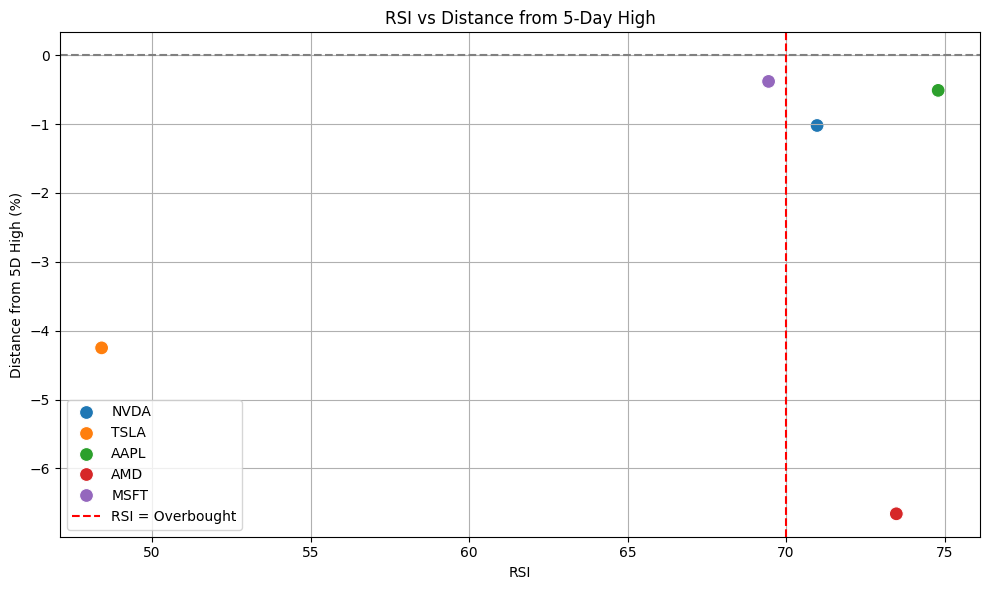

In [6]:
# Reveals how “overbought” a stock is and how close it is to recent highs.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="rsi", y="dist_from_5d_high", hue="ticker", s=100)

plt.axhline(0, color="gray", linestyle="--")
plt.axvline(70, color="red", linestyle="--", label="RSI = Overbought")

plt.title("RSI vs Distance from 5-Day High")
plt.xlabel("RSI")
plt.ylabel("Distance from 5D High (%)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()